<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
import seaborn as sns
import numpy as np



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




<Figure size 1400x600 with 0 Axes>

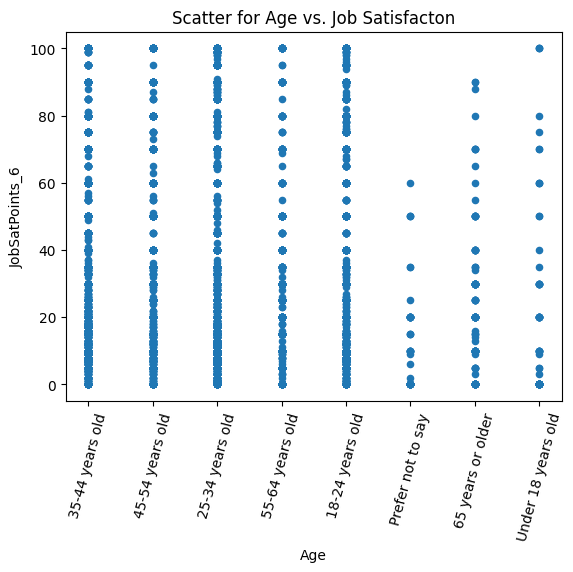

In [3]:
## Write your code here
df_age_sat = df[['Age', 'JobSatPoints_6']]
df_age_sat = df_age_sat.dropna()
plt.figure(figsize = (14,6))
df_age_sat.plot(kind='scatter', x='Age', y='JobSatPoints_6')
plt.title('Scatter for Age vs. Job Satisfacton')
plt.xticks(rotation = 75)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


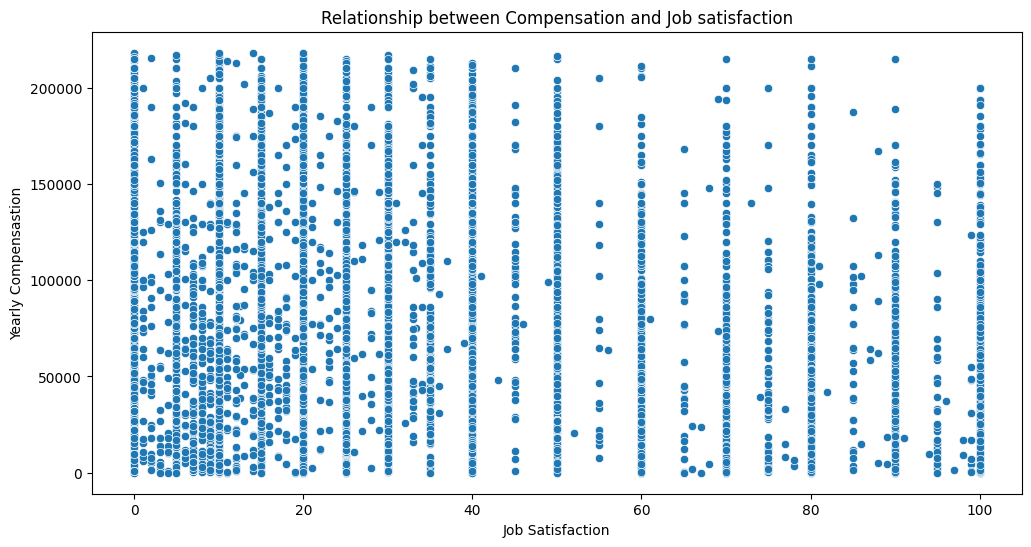

In [4]:
## Write your code here
df_yc_sa = df[['ConvertedCompYearly', 'JobSatPoints_6']]
df_yc_sa = df_yc_sa.dropna()
Q1 = df_yc_sa['ConvertedCompYearly'].quantile(0.25)
Q3 = df_yc_sa['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_yc_sa = df_yc_sa[(df_yc_sa['ConvertedCompYearly']>= lower_bound) & (df_yc_sa['ConvertedCompYearly']<= upper_bound)]
plt.figure(figsize = (12, 6))
sns.scatterplot(df_yc_sa, x='JobSatPoints_6', y = 'ConvertedCompYearly')
plt.title('Relationship between Compensation and Job satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensastion')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [5]:
## Write your code here
df_age_job = df[['Age', 'JobSatPoints_6']]
df_age_job = df_age_job.dropna()
df_age_job = df_age_job.copy()
df_age_job['Age_num']=df_age_job['Age'].replace({'Under 18 years old': 16, 
                                         '18-24 years old': 21,
                                         '25-34 years old': 29,
                                         '35-44 years old': 39,
                                         '45-54 years old': 49,
                                         '55-64 years old': 59,
                                         '65 years or older': 68,
                                         'Prefer not to say': np.nan})
df_age_job.dropna()

/tmp/ipykernel_1523/1783679101.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_age_job['Age_num']=df_age_job['Age'].replace({'Under 18 years old': 16,


,Age,JobSatPoints_6,Age_num
1,35-44 years old,0.0,39.0
10,35-44 years old,25.0,39.0
12,35-44 years old,30.0,39.0
15,45-54 years old,0.0,49.0
18,25-34 years old,60.0,29.0
...,...,...,...
65178,45-54 years old,0.0,49.0
65218,25-34 years old,0.0,29.0
65265,18-24 years old,60.0,21.0
65351,25-34 years old,0.0,29.0


/tmp/ipykernel_1523/1287739598.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_age_ycp['Age_num']=df_age_ycp['Age'].replace({'Under 18 years old': 16,


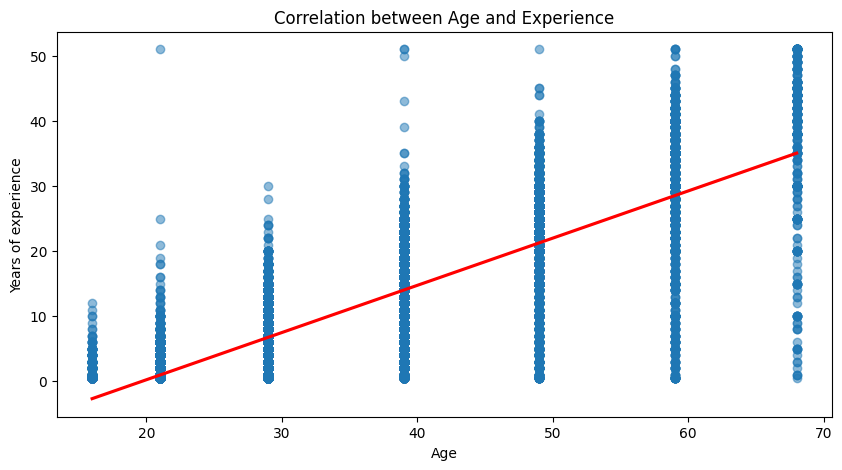

In [6]:
## Write your code here
df_age_ycp = df[['Age', 'YearsCodePro']]
df_age_ycp = df_age_ycp.dropna()
df_age_ycp = df_age_ycp.copy()
df_age_ycp['Age_num']=df_age_ycp['Age'].replace({'Under 18 years old': 16, 
                                         '18-24 years old': 21,
                                         '25-34 years old': 29,
                                         '35-44 years old': 39,
                                         '45-54 years old': 49,
                                         '55-64 years old': 59,
                                         '65 years or older': 68,
                                         'Prefer not to say': np.nan})
df_age_ycp = df_age_ycp.dropna()
df_age_ycp['YearsCodePro'] = df_age_ycp['YearsCodePro'].replace({'Less than 1 year': 0.5,
                                                                 'More than 50 years': 51})
df_age_ycp['YearsCodePro'] = pd.to_numeric(df_age_ycp['YearsCodePro'], errors = 'coerce')
plt.figure(figsize = (10, 5))
sns.regplot(x='Age_num', y='YearsCodePro', data = df_age_ycp, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Age and Experience')
plt.xlabel('Age')
plt.ylabel('Years of experience')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [7]:
## Write your code here
df_comp_sat_age = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']]
df_comp_sat_age = df_comp_sat_age.dropna()
map_age = {'Under 18 years old': 16, 
                                         '18-24 years old': 21,
                                         '25-34 years old': 29,
                                         '35-44 years old': 39,
                                         '45-54 years old': 49,
                                         '55-64 years old': 59,
                                         '65 years or older': 68,
                                         'Prefer not to say': np.nan}
df_comp_sat_age['Age_num'] = df_comp_sat_age['Age'].map(map_age)
df_comp_sat_age = df_comp_sat_age.dropna()
Q1 = df_comp_sat_age['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp_sat_age['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_sat_age = df_comp_sat_age[(df_comp_sat_age['ConvertedCompYearly']>= lower_bound) & (df_comp_sat_age['ConvertedCompYearly']<= upper_bound)]
df_comp_sat_age['ConvertedCompYearly'].dtypes

dtype('float64')

<Axes: xlabel='JobSatPoints_6', ylabel='ConvertedCompYearly'>

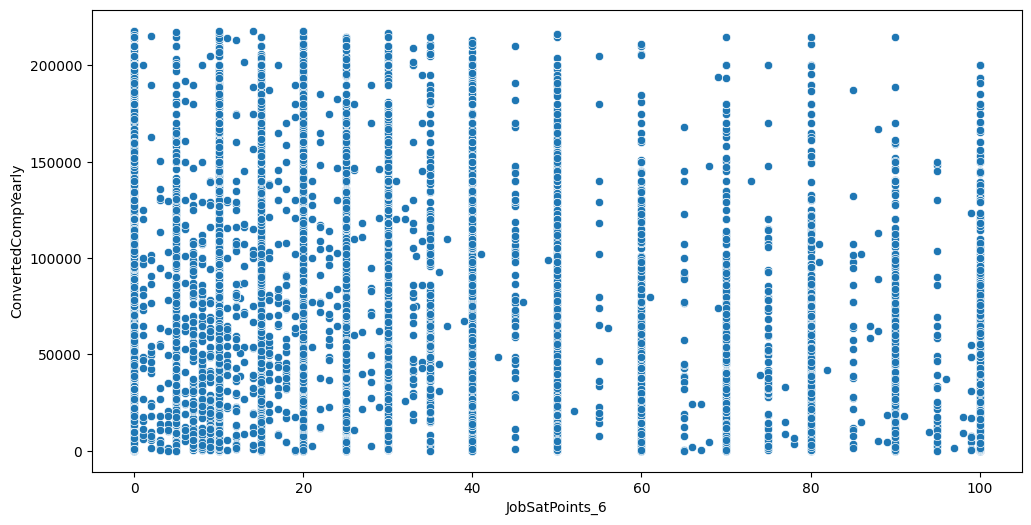

In [8]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df_comp_sat_age, x = 'JobSatPoints_6', y ='ConvertedCompYearly',
                     sizes = 'Age_num')

In [9]:
df_comp_sat_age.to_csv('df_comp_sat_age.csv')


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [10]:
## Write your code here
df_langue_sat = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']]
df_langue_sat = df_langue_sat.dropna()
df_langue_sat['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                           541
Python                                                   303
C#;HTML/CSS;JavaScript;SQL;TypeScript                    266
HTML/CSS;JavaScript;PHP;SQL                              232
C#;HTML/CSS;JavaScript;SQL                               222
                                                        ... 
Assembly;Bash/Shell (all shells);C;C++;Go;Python;Rust      1
C;Perl;Python;R;SQL                                        1
C;C++;Go;Java;Lua;Python;Swift                             1
C;C#;C++;JavaScript;Lua;Perl;SQL;TypeScript                1
C#;Go;Java;JavaScript;Ruby;Rust;SQL                        1
Name: count, Length: 12870, dtype: int64

In [11]:
df_langue_sat['Lang_worked_counts'] = df_langue_sat['LanguageHaveWorkedWith'].str.split(';').str.len()
df_langue_sat= df_langue_sat[df_langue_sat['Lang_worked_counts']<=5]
from collections import Counter
!pip install matplotlib-venn
from matplotlib_venn import venn2

In [12]:
have_worked_counts = Counter(df_langue_sat['LanguageHaveWorkedWith'].str.split(';').explode().str.strip())
df_langue_sat['LanguageHaveWorkedWith'] = df_langue_sat['LanguageHaveWorkedWith'].str.split(';')
df_langue_sat = df_langue_sat.explode('LanguageHaveWorkedWith')
df_langue_sat

,LanguageHaveWorkedWith,JobSatPoints_6,Lang_worked_counts
10,JavaScript,25.0,3
10,Python,25.0,3
10,Ruby,25.0,3
12,Bash/Shell (all shells),30.0,5
12,C#,30.0,5
...,...,...,...
65168,Kotlin,0.0,4
65168,TypeScript,0.0,4
65178,C++,0.0,2
65178,Python,0.0,2


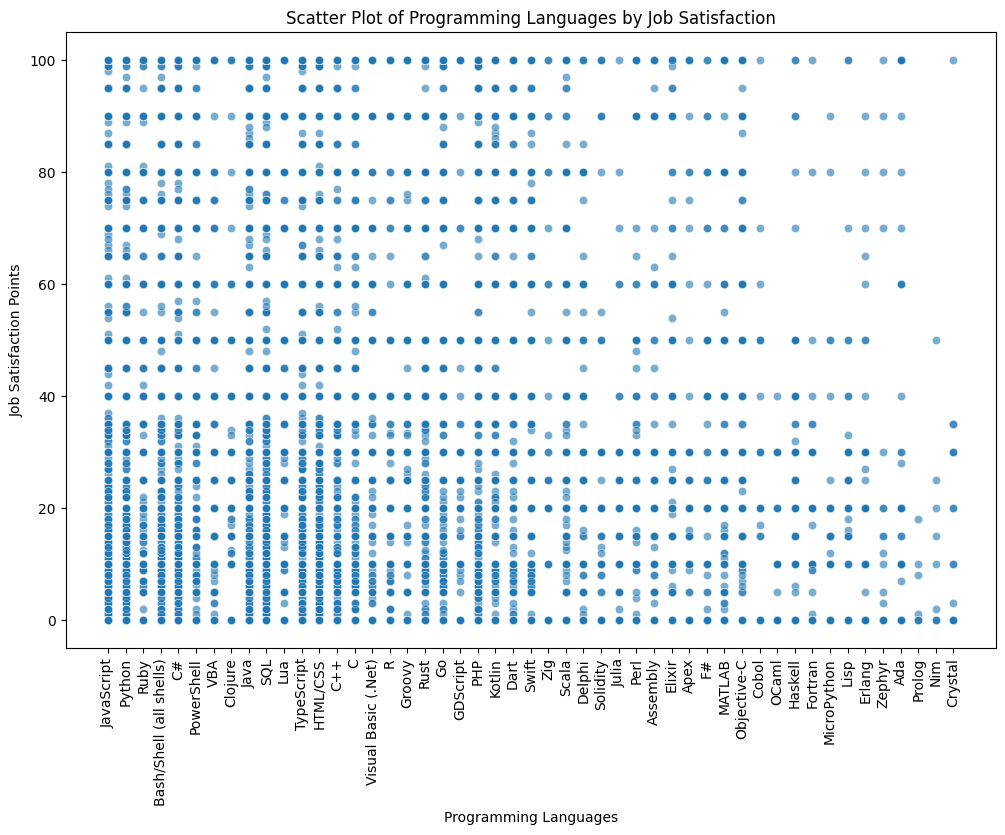

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LanguageHaveWorkedWith', y='JobSatPoints_6', data=df_langue_sat, alpha=0.6)
plt.title('Scatter Plot of Programming Languages by Job Satisfaction')
plt.xlabel('Programming Languages')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


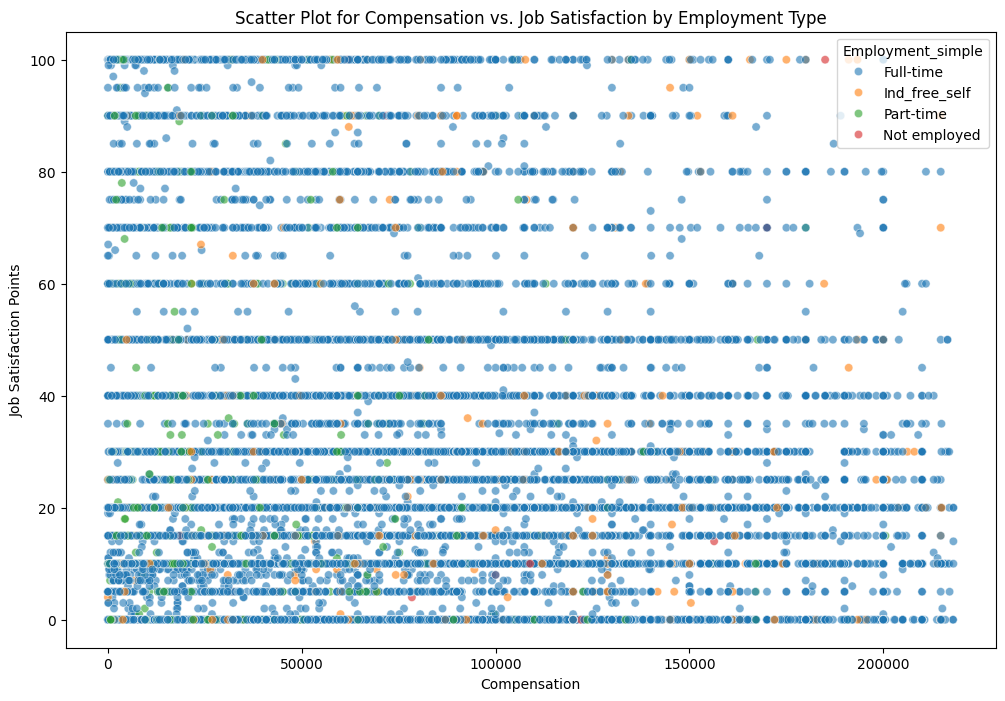

In [14]:
## Write your code here
df_comp_sa_emp = df[['ConvertedCompYearly', 'Employment', 'JobSatPoints_6']]
df_comp_sa_emp = df_comp_sa_emp.dropna()
Q1 = df_comp_sa_emp['ConvertedCompYearly'].quantile(0.25)
Q3 = df_comp_sa_emp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df_comp_sa_emp = df_comp_sa_emp[(df_comp_sa_emp['ConvertedCompYearly']>= lower_bound) & (df_comp_sa_emp['ConvertedCompYearly']<= upper_bound)]
def simplify_employment(entry):
    if 'Employed, full-time' in entry:
        return "Full-time"
    elif "Employed, part-time" in entry:
        return "Part-time"
    elif "Not employed" in entry:
        return "Not employed"
    elif "freelancer" in entry:
        return "Ind_free_self"
    elif "Retired" in entry:
        return "Retired"
    else:
        return "Other"
df_comp_sa_emp['Employment_simple'] = df_comp_sa_emp['Employment'].apply(simplify_employment)
plt.figure(figsize=(12, 8))
sns.scatterplot(y='JobSatPoints_6', x='ConvertedCompYearly', data=df_comp_sa_emp, hue = 'Employment_simple', alpha=0.6)
plt.title('Scatter Plot for Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Compensation')
plt.ylabel('Job Satisfaction Points')
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1665/3127771598.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


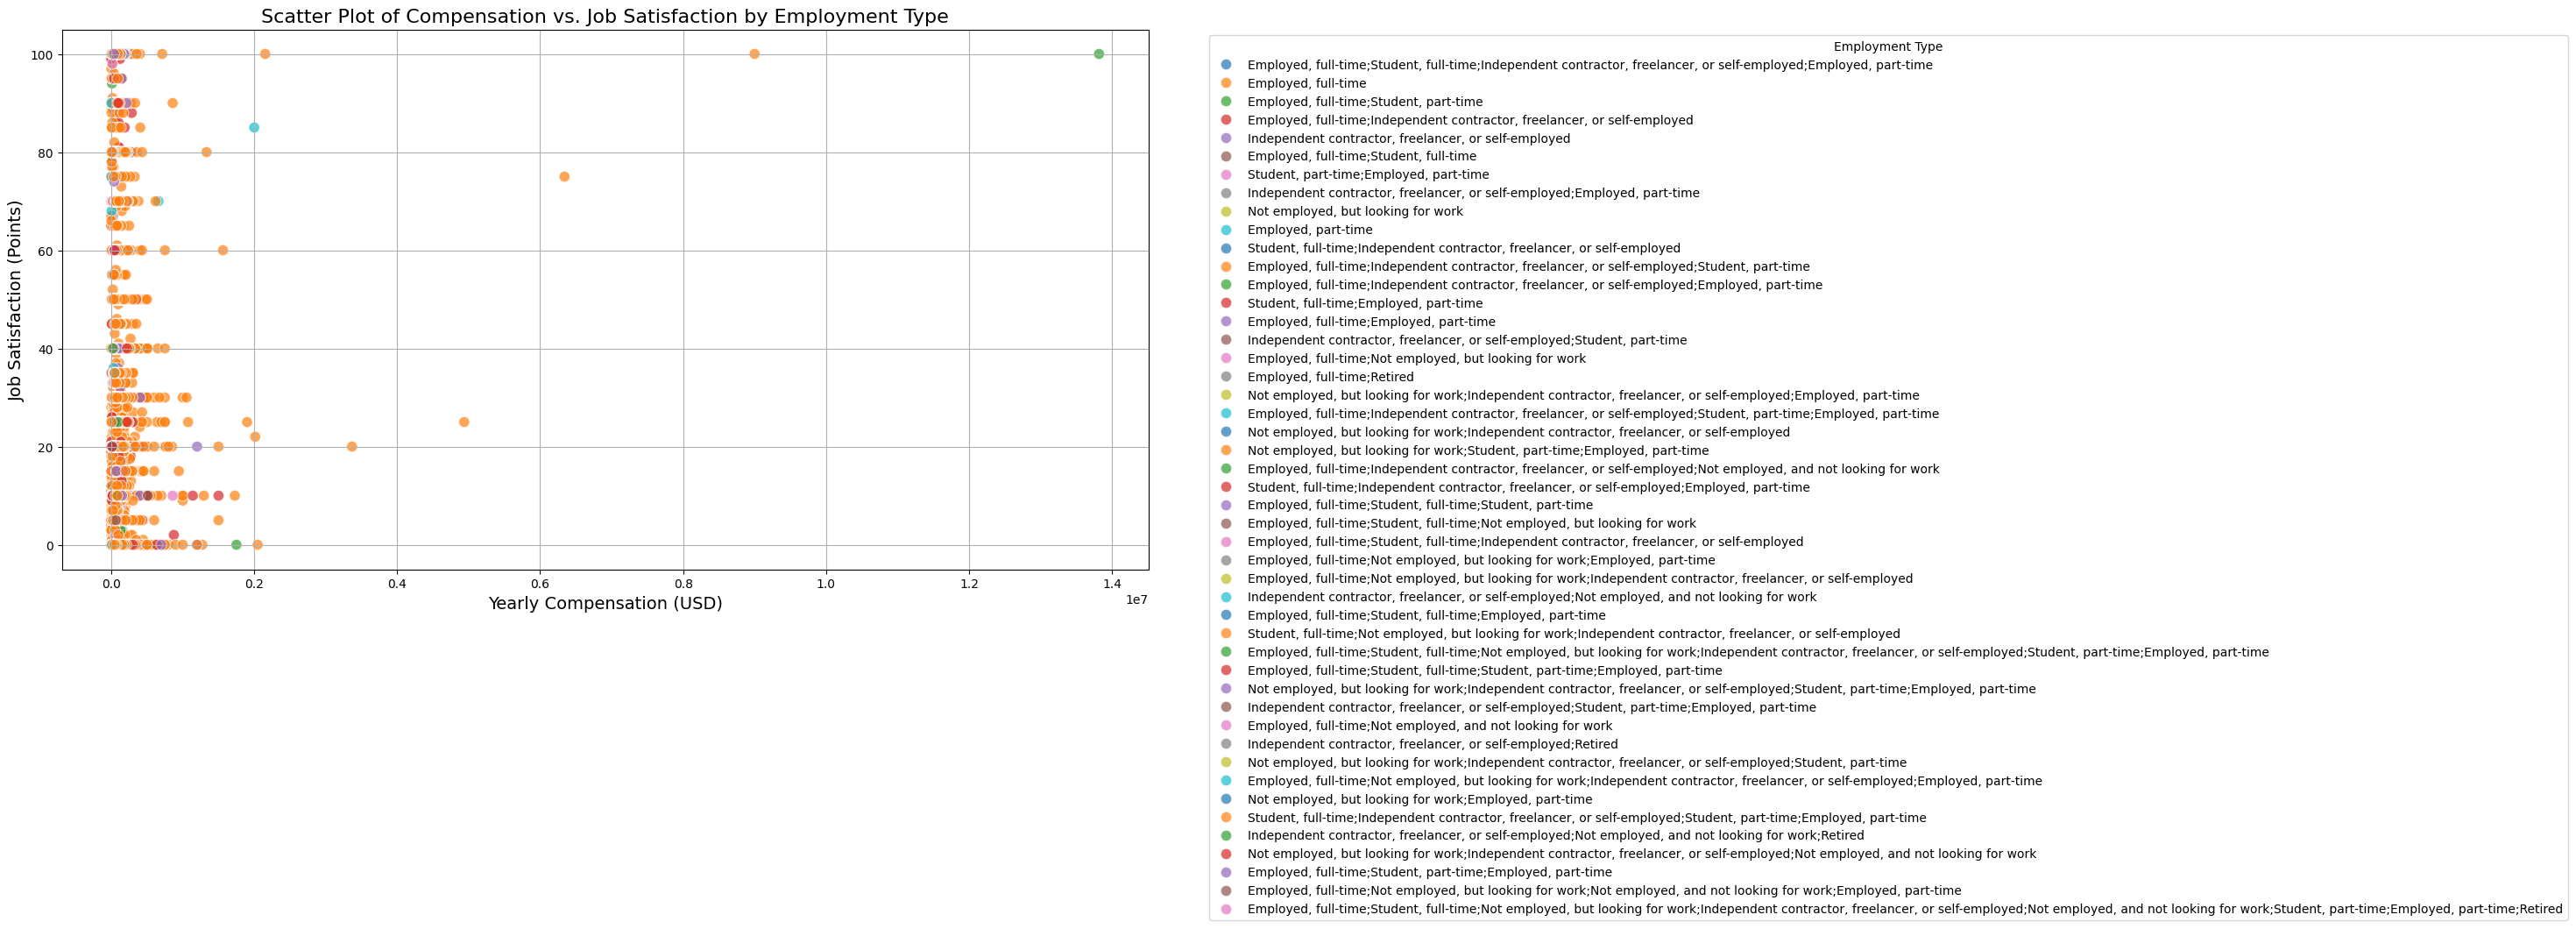

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not done yet)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Filter out rows with missing values in relevant columns
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Plot settings
plt.figure(figsize=(16, 8))  # Wider figure to fit legend outside

# Create scatter plot: Compensation vs Job Satisfaction, colored by Employment type
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    palette='tab10',
    alpha=0.7,
    edgecolor='w',  # White edges for clarity
    s=80            # Marker size
)

# Titles and axis labels
plt.title('Scatter Plot of Compensation vs. Job Satisfaction by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction (Points)', fontsize=14)

# Legend outside the plot
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})

# Grid for readability
plt.grid(True)

# Adjust layout: leave space on right for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_1665/1554595044.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


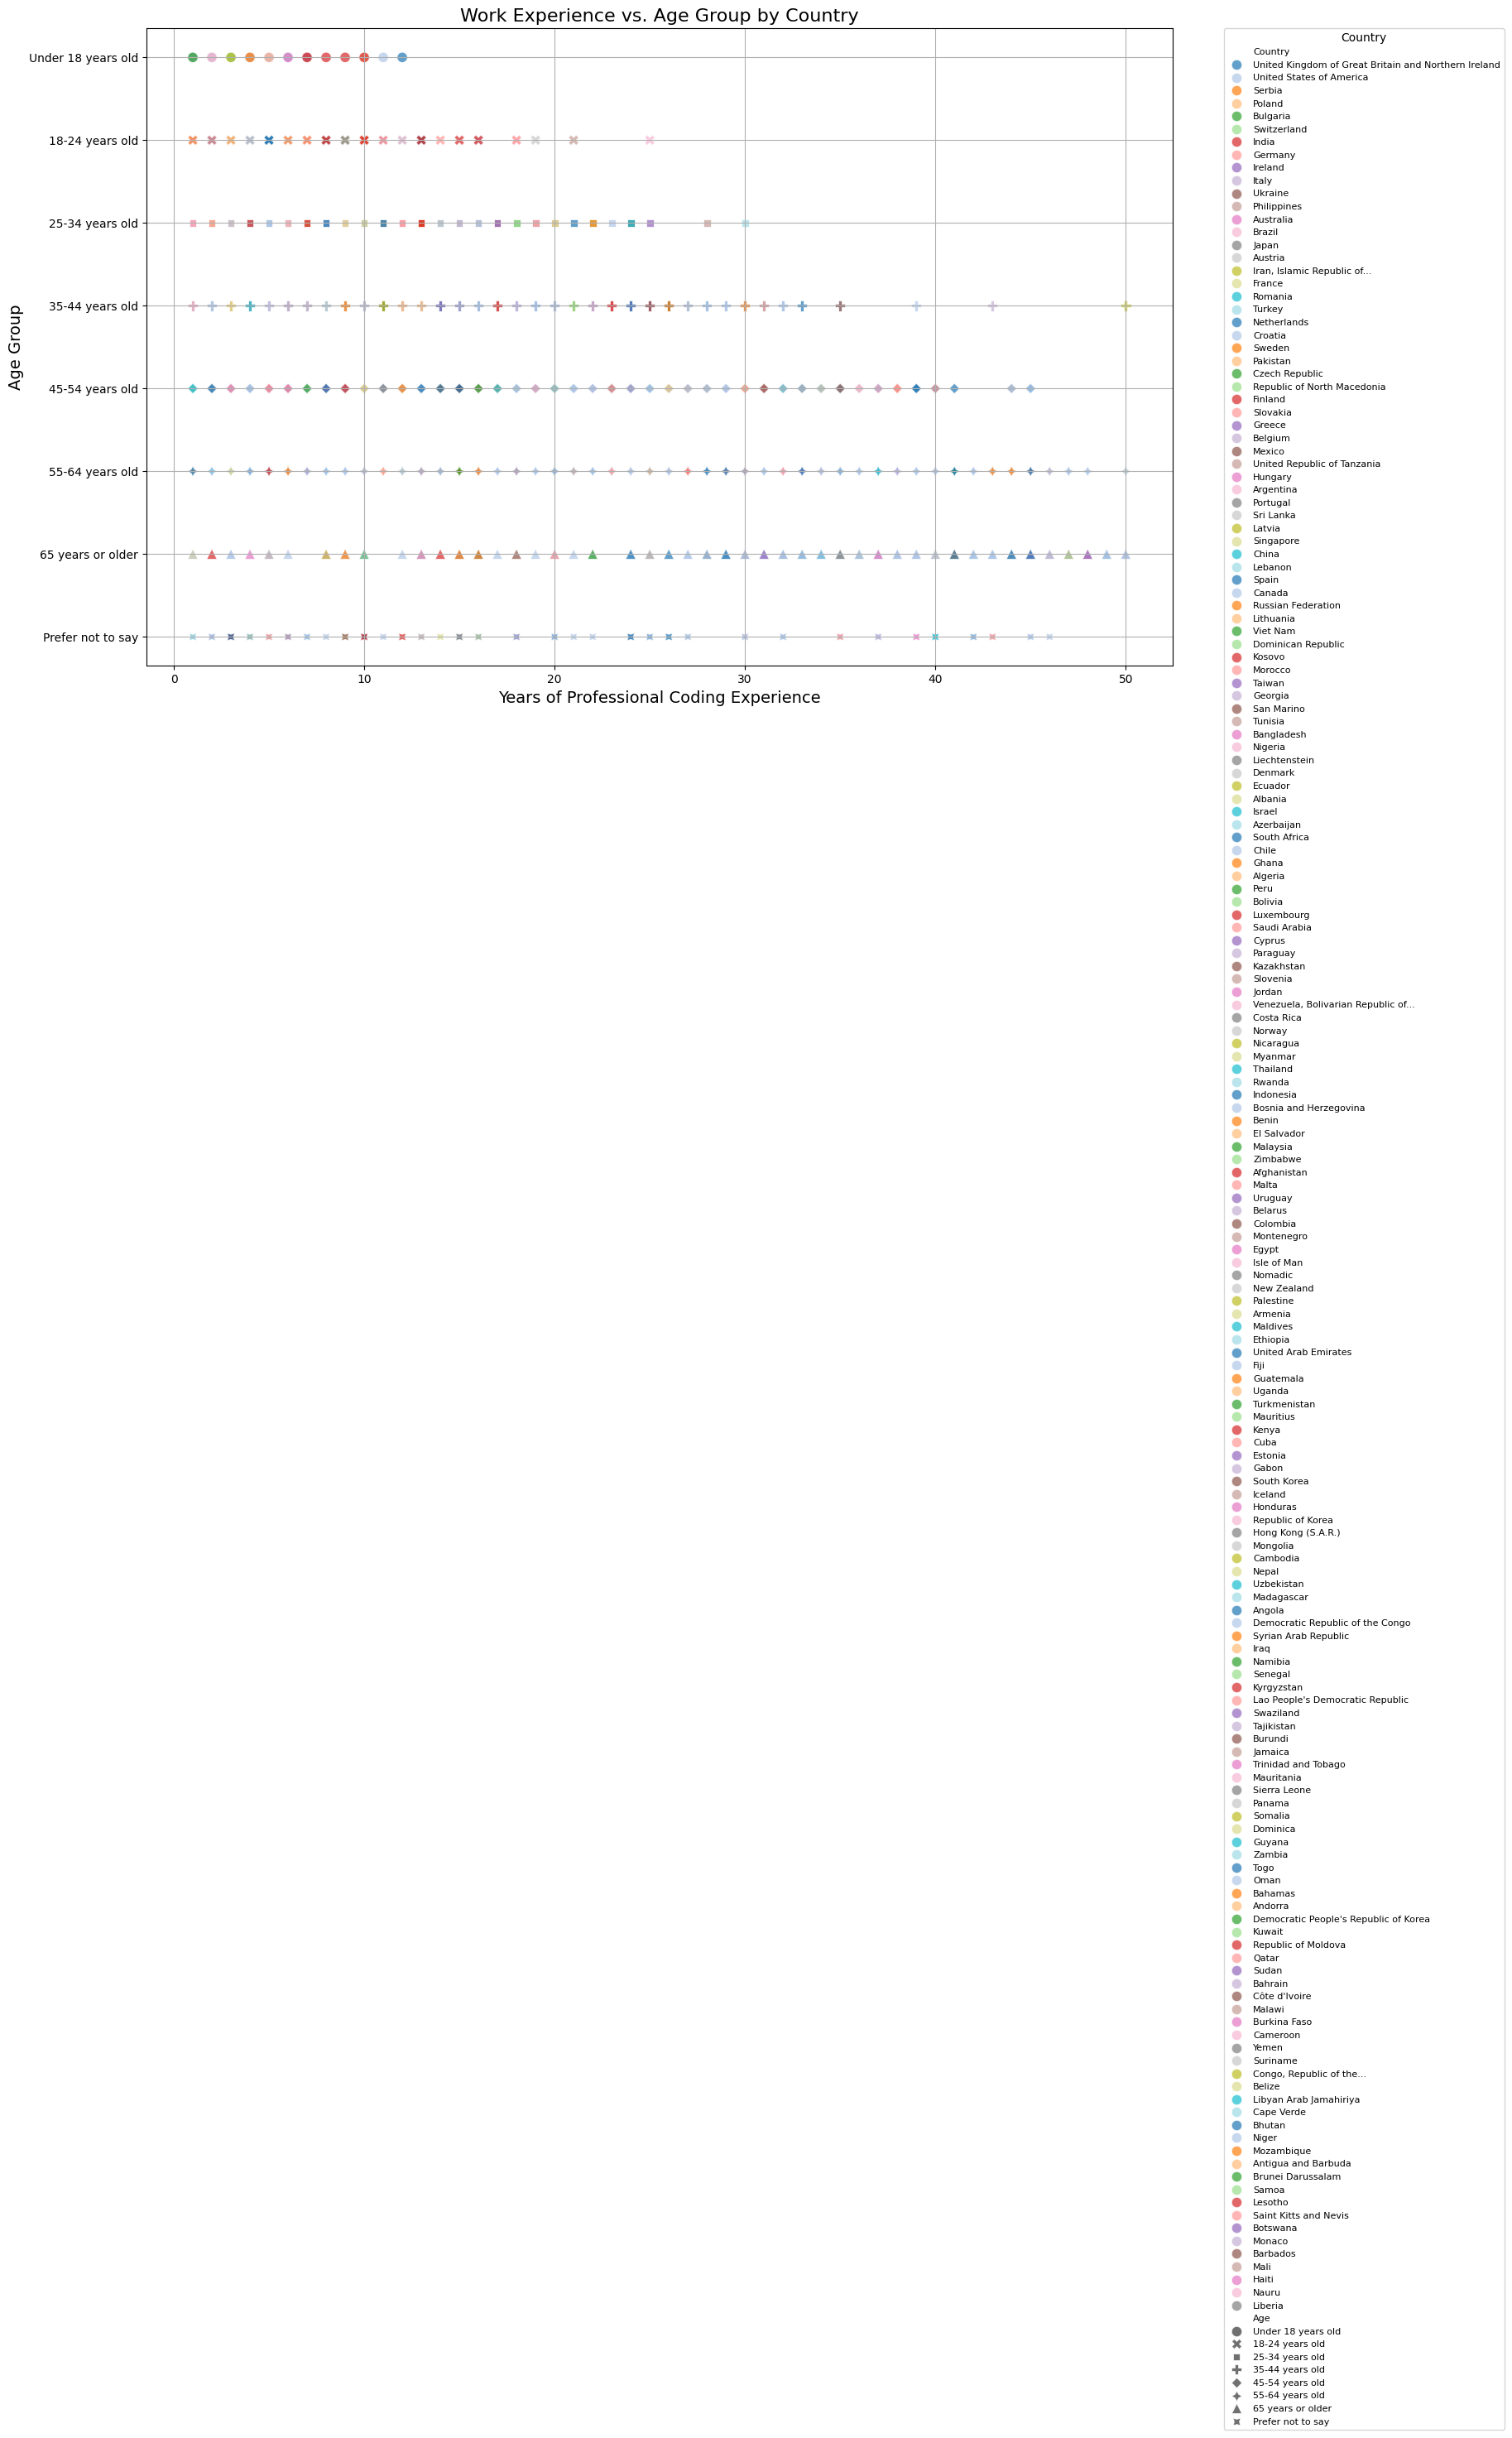

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (if not already loaded)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Filter to rows with no missing values in the needed columns
df_filtered = df.dropna(subset=['YearsCodePro', 'Age', 'Country']).copy()

# Convert 'YearsCodePro' to numeric (some values may be strings like 'Less than 1 year')
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['YearsCodePro'])

# Define an ordered categorical type for Age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

plt.figure(figsize=(16, 10))  # Larger figure to accommodate legend and labels

# Create scatter plot:
# - X axis: YearsCodePro (numeric work experience)
# - Y axis: Age (categorical, ordered)
# - Hue: Country (colors)
# - Style: Age groups (different markers for visual clarity)
sns.scatterplot(
    data=df_filtered,
    x='YearsCodePro',
    y='Age',
    hue='Country',
    style='Age',
    palette='tab20',   # A large palette suitable for many countries
    alpha=0.7,
    edgecolor='w',
    s=80,
    legend='brief'
)

plt.title('Work Experience vs. Age Group by Country', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Place legend outside the plot to avoid overlap
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

plt.grid(True)

# Adjust layout: leave space on the right for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
